In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
cd /content/gdrive/My\ Drive/chatbot

/content/gdrive/My Drive/chatbot


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
data = open('question_list_medlineplus_lab.txt', 'r')
Lines = data.readlines()

In [ ]:
# list(Lines)
df = pd.DataFrame({"question": list(Lines)})

In [ ]:
# df.head(3)
df

,question
0,are there any risks to a complement blood test?\n
1,are there any risks to a d-dimer test?\n
2,are there any risks to a dental exam?\n
3,are there any risks to a fall risk assessment?\n
4,are there any risks to a free light chains tes...
...,...
1068,will i need to do anything to prepare for this...
1069,will i need to do anything to prepare for visi...
1070,will i need to do anything to prepare my baby ...
1071,will i need to do anything to prepare my child...


#Text Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

df.head()

,question
0,are there any risks to a complement blood test?\n
1,are there any risks to a d-dimer test?\n
2,are there any risks to a dental exam?\n
3,are there any risks to a fall risk assessment?\n
4,are there any risks to a free light chains tes...


In [ ]:
#Lower Casing

df["question"] = df["question"].str.lower()
df.head()

,question
0,are there any risks to a complement blood test?\n
1,are there any risks to a d-dimer test?\n
2,are there any risks to a dental exam?\n
3,are there any risks to a fall risk assessment?\n
4,are there any risks to a free light chains tes...


In [ ]:
#Removal of Punctuations

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["question"] = df["question"].apply(lambda text: remove_punctuation(text))
df.head()

,question
0,are there any risks to a complement blood test\n
1,are there any risks to a ddimer test\n
2,are there any risks to a dental exam\n
3,are there any risks to a fall risk assessment\n
4,are there any risks to a free light chains test\n


In [ ]:
#Removal of stopwords

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["question"] = df["question"].apply(lambda text: remove_stopwords(text))
df.head()

,question
0,risks complement blood test
1,risks ddimer test
2,risks dental exam
3,risks fall risk assessment
4,risks free light chains test


In [ ]:
# Removal of Frequent words

# from collections import Counter
# cnt = Counter()
# for text in df["question"].values:
#     for word in text.split():
#         cnt[word] += 1
        
# cnt.most_common(20)

[('test', 670),
 ('need', 493),
 ('anything', 251),
 ('happens', 249),
 ('else', 224),
 ('know', 223),
 ('blood', 160),
 ('tests', 74),
 ('screening', 59),
 ('testing', 48),
 ('urine', 46),
 ('prepare', 30),
 ('risks', 29),
 ('analysis', 20),
 ('genetic', 18),
 ('levels', 18),
 ('exam', 16),
 ('tumor', 16),
 ('marker', 16),
 ('count', 15)]

In [ ]:
# FREQWORDS = set([w for (w, wc) in cnt.most_common(6)])
# def remove_freqwords(text):
#     """custom function to remove the frequent words"""
#     return " ".join([word for word in str(text).split() if word not in FREQWORDS])

# df["question"] = df["question"].apply(lambda text: remove_freqwords(text))
# df.head()

,question
0,risks complement blood
1,risks ddimer
2,risks dental exam
3,risks fall risk assessment
4,risks free light chains


In [ ]:
#Removal of Rare words

# n_rare_words = 10
# RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
# def remove_rarewords(text):
#     """custom function to remove the rare words"""
#     return " ".join([word for word in str(text).split() if word not in RAREWORDS])

# df["question"] = df["question"].apply(lambda text: remove_rarewords(text))
# df.head()

In [ ]:
#Removal of Emojis

# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

remove_emoji("game is on 🔥🔥")

'game is on '

In [ ]:
df["question"] = df["question"].apply(lambda text: remove_emoji(text))
df.head()

,question
0,risks complement blood test
1,risks ddimer test
2,risks dental exam
3,risks fall risk assessment
4,risks free light chains test


In [ ]:
#Removal of URLs

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [ ]:
text = "Please refer to link http://lnkd.in/ecnt5yC for the paper"
remove_urls(text)

'Please refer to link  for the paper'

In [ ]:
df["question"] = df["question"].apply(lambda text: remove_urls(text))
df.head()

,question
0,risks complement blood test
1,risks ddimer test
2,risks dental exam
3,risks fall risk assessment
4,risks free light chains test


#Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["question"] = df["question"].apply(lambda text: stem_words(text))
df.head()

,question
0,risk complement blood test
1,risk ddimer test
2,risk dental exam
3,risk fall risk assess
4,risk free light chain test


In [ ]:
from nltk.stem.snowball import SnowballStemmer
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

#Lemmatization

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["question"] = df["question"].apply(lambda text: lemmatize_words(text))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,question
0,risk complement blood test
1,risk ddimer test
2,risk dental exam
3,risk fall risk ass
4,risk free light chain test


In [ ]:
lemmatizer.lemmatize("running")

'running'

In [ ]:
lemmatizer.lemmatize("running", "v") # v for verb

'run'

In [ ]:
print("Word is : stripes")
print("Lemma result for verb : ",lemmatizer.lemmatize("stripes", 'v'))
print("Lemma result for noun : ",lemmatizer.lemmatize("stripes", 'n'))

Word is : stripes
Lemma result for verb :  strip
Lemma result for noun :  stripe


In [ ]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["question"] = df["question"].apply(lambda text: lemmatize_words(text))
df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,question
0,risk complement blood test
1,risk ddimer test
2,risk dental exam
3,risk fall risk as
4,risk free light chain test


In [ ]:
#Spelling Correction

!pip install pyspellchecker

In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
text = "speling correctin"
correct_spellings(text)

'spelling correcting'

In [ ]:
df["question"] = df["question"].apply(lambda text: correct_spellings(text))
df.head()

,question
0,risk complement blood test
1,risk driver test
2,risk dental exam
3,risk fall risk as
4,risk free light chain test


In [ ]:
df

,question
0,risk complement blood test
1,risk driver test
2,risk dental exam
3,risk fall risk as
4,risk free light chain test
...,...
1068,need anyth prepare test
1069,need anyth prepare vision screen
1070,need anyth prepare babi test
1071,need anyth prepare child autism spectrum disco...


#TFIDF calculation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
vector = TfidfVectorizer(max_df=0.3,         # drop words that occur in more than X percent of documents
                             min_df=3,      # only use words that appear at least X times
                             stop_words='english', # remove stop words
                             lowercase=True, # Convert everything to lower case 
                             use_idf=True,   # Use idf
                             norm=u'l2',     # Normalization
                             smooth_idf=True # Prevents divide-by-zero errors
                            )
tfidf = vector.fit_transform(df["question"])

In [ ]:
tfidf

<1073x54 sparse matrix of type '<class 'numpy.float64'>'
	with 982 stored elements in Compressed Sparse Row format>

#Elbow Method

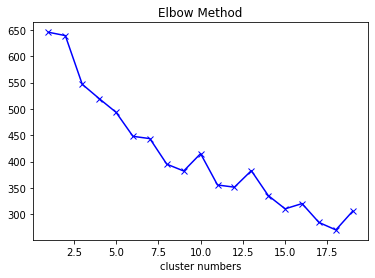

In [ ]:
# Using elbow method to determine number of cluster
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

K = range(1,20)
SSE = []
for k in K:
    kmeans = MiniBatchKMeans(n_clusters = k, batch_size = 50)
    kmeans.fit(tfidf)
    SSE.append(kmeans.inertia_)
    
plt.plot(K,SSE,'bx-')
plt.title('Elbow Method')
plt.xlabel('cluster numbers')
plt.show()

#Clustering  Kmeans

In [ ]:
k = 10
kmeans = MiniBatchKMeans(n_clusters = k)
kmeans.fit(tfidf)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = vector.get_feature_names()

In [ ]:
# centers of the clusters
for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:10]:
        word_list.append(terms[j])
    print(word_list) 

cluster0:
['analysis', 'prepare', 'panel', 'blood', 'cop', 'exam', 'tumor', 'marker', 'count', 'acid']
cluster1:
['blood', 'white', 'cop', 'fluid', 'exam', 'eval', 'disease', 'discord', 'depress', 'cultur']
cluster2:
['ruin', 'phosphate', 'keaton', 'protein', 'cell', 'blood', 'cop', 'eval', 'disease', 'discord']
cluster3:
['level', 'blood', 'test', 'white', 'cop', 'exam', 'eval', 'disease', 'discord', 'depress']
cluster4:
['screen', 'depress', 'antibody', 'prepare', 'use', 'child', 'eval', 'disease', 'discord', 'cultur']
cluster5:
['genet', 'bra', 'cop', 'fluid', 'exam', 'eval', 'disease', 'discord', 'depress', 'cultur']
cluster6:
['risk', 'test', 'screen', 'exam', 'level', 'disease', 'hear', 'cord', 'prepare', 'blood']
cluster7:
['test', 'prepare', 'allergic', 'count', 'use', 'function', 'hear', 'vitamin', 'blood', 'peptic']
cluster8:
['cultur', 'white', 'cop', 'fluid', 'exam', 'eval', 'disease', 'discord', 'depress', 'csi']
cluster9:
['calcium', 'ruin', 'blood', 'white', 'cop', 'exam

In [ ]:
# set(df["question"])
titles = set(df['question'])
sentences = list(titles)
len(sentences)

1048

#Sentence Transformer

In [ ]:
pip install -U sentence-transformers

     |████████████████████████████████| 85 kB 2.7 MB/s 
     |████████████████████████████████| 2.6 MB 13.3 MB/s 
     |████████████████████████████████| 1.2 MB 30.2 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 636 kB 32.4 MB/s 
     |████████████████████████████████| 895 kB 42.2 MB/s 
     |████████████████████████████████| 3.3 MB 45.3 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.0.0-py3-none-any.whl size=126709 sha256=44336687e9eec06def7eb4376d69e71286d882a3784e5f637ff4cac02c39abf9
  Stored in directory: /root/.cache/pip/wheels/d1/c1/0f/faafd427f705c4b012274ba60d9a91d75830306811e1355293
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer

In [ ]:
data = open('question_list_medlineplus_lab.txt', 'r')
Lines = data.readlines()
df = pd.DataFrame({"question": list(Lines)})
df

,question
0,are there any risks to a complement blood test?\n
1,are there any risks to a d-dimer test?\n
2,are there any risks to a dental exam?\n
3,are there any risks to a fall risk assessment?\n
4,are there any risks to a free light chains tes...
...,...
1068,will i need to do anything to prepare for this...
1069,will i need to do anything to prepare for visi...
1070,will i need to do anything to prepare my baby ...
1071,will i need to do anything to prepare my child...


In [ ]:
titles = set(df['question'].str.lower())
sentences = list(titles)
len(sentences)

1073

In [ ]:
model = SentenceTransformer('paraphrase-mpnet-base-v2')
sentence_embeddings = model.encode(sentences)
# sentence_embeddings[0]

In [ ]:
sentence_embeddings.shape

(1073, 768)

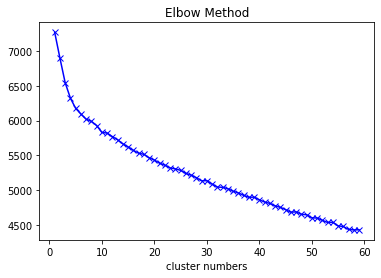

In [ ]:
SSE = []

for k in range(1, 60):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(sentence_embeddings)
    SSE.append(kmeans.inertia_)
    
plt.plot(range(1, 60), SSE, 'bx-')
plt.title('Elbow Method')
plt.xlabel('cluster numbers')
plt.show()

In [ ]:
#Hyperparameter 1
n_clusters = 10

km = KMeans(n_clusters=n_clusters)

km.fit(sentence_embeddings)
centers = km.cluster_centers_.argsort()[:,::-1]

print("Len of Labels: ",
       len(set(km.labels_)), 
       " Params: ", 
       km.get_params())

Len of Labels:  10  Params:  {'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 10, 'n_init': 10, 'n_jobs': None, 'precompute_distances': 'auto', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [ ]:
test_cases = random.sample(range(0, len(sentences) - 1), 30)
for i in test_cases:
    print(sentences[i], km.predict(sentence_embeddings[i].reshape(-1, 1).T))

what is an ast test?
 [1]
why do i need a breast biopsy?
 [0]
what is a whooping cough test?
 [2]
what happens during an rbc antibody screen?
 [5]
why do i need a bacteria culture test?
 [2]
why do i need a ketones in urine test?
 [8]
what happens during an rsv test?
 [2]
what happens during a t3 test?
 [5]
is there anything else i should know about a blood glucose test?
 [3]
why do i need a rash evaluation?
 [0]
will i need to do anything to prepare my child for autism spectrum disorder screening?
 [9]
what is a prostate-specific antigen (psa) test?
 [1]
what is a salicylates level test?
 [1]
why do i need a chickenpox or shingles test?
 [0]
are there any risks to the screening?
 [7]
why do i need a creatinine test?
 [6]
why do i need a catecholamine test?
 [6]
what is an immunofixation (ife) blood test?
 [1]
why do i need an antibiotic sensitivity test?
 [0]
is there anything else i need to know about a barium swallow?
 [4]
is there anything else i need to know about a pth test?
 [3]

#PCA

In [ ]:
# Hyperparameter 1 
n_dimention = 10
pca = PCA(n_components=n_dimention)
reduced_data = pca.fit_transform(sentence_embeddings)

In [ ]:
reduced_data.shape

(1073, 10)

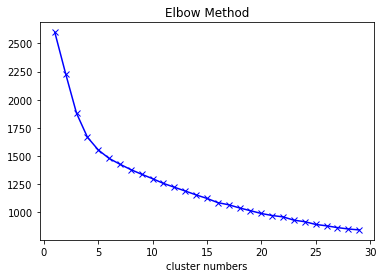

In [ ]:
SSE = []

for k in range(1, 30):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(reduced_data)
    SSE.append(kmeans.inertia_)
    
plt.plot(range(1, 30), SSE, 'bx-')
plt.title('Elbow Method')
plt.xlabel('cluster numbers')
plt.show()

In [ ]:
# Hyperparameter 2
n_clusters = 5

km = KMeans(n_clusters=n_clusters)

km.fit(reduced_data)
centers = km.cluster_centers_.argsort()[:,::-1]

print("Len of Labels: ",
       len(set(km.labels_)), 
       " Params: ", 
       km.get_params())

Len of Labels:  5  Params:  {'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 5, 'n_init': 10, 'n_jobs': None, 'precompute_distances': 'auto', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [ ]:
for i in test_cases:
    print(sentences[i], km.predict(reduced_data[i].reshape(-1, 1).T))

what is an ast test?
 [4]
why do i need a breast biopsy?
 [3]
what is a whooping cough test?
 [4]
what happens during an rbc antibody screen?
 [1]
why do i need a bacteria culture test?
 [3]
why do i need a ketones in urine test?
 [3]
what happens during an rsv test?
 [1]
what happens during a t3 test?
 [1]
is there anything else i should know about a blood glucose test?
 [2]
why do i need a rash evaluation?
 [3]
will i need to do anything to prepare my child for autism spectrum disorder screening?
 [0]
what is a prostate-specific antigen (psa) test?
 [4]
what is a salicylates level test?
 [4]
why do i need a chickenpox or shingles test?
 [3]
are there any risks to the screening?
 [0]
why do i need a creatinine test?
 [3]
why do i need a catecholamine test?
 [3]
what is an immunofixation (ife) blood test?
 [4]
why do i need an antibiotic sensitivity test?
 [3]
is there anything else i need to know about a barium swallow?
 [2]
is there anything else i need to know about a pth test?
 [2]